In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 12s 0us/step


(50000, 32, 32, 3)

50000 training samples

32x32 size

3 is RGB

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

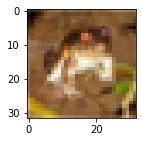

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

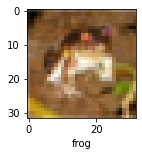

In [15]:
plot_sample(X_train, y_train, 0)

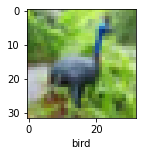

In [16]:
plot_sample(X_train, y_train, 6)

In [17]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
#Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
#Simple ANN

ANN = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ANN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8161 - accuracy: 0.3514
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6238 - accuracy: 0.4254
Epoch 3/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5415 - accuracy: 0.4585
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4831 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4314 - accuracy: 0.4953


In [19]:
#Note: You can see that at the end of 5 epochs, accuracy is at around 49% and computation time is more

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.39      0.48      1000
           1       0.54      0.66      0.60      1000
           2       0.43      0.19      0.26      1000
           3       0.38      0.24      0.29      1000
           4       0.47      0.30      0.36      1000
           5       0.57      0.20      0.29      1000
           6       0.36      0.78      0.49      1000
           7       0.50      0.56      0.53      1000
           8       0.42      0.79      0.55      1000
           9       0.53      0.50      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.44     10000
weighted avg       0.48      0.46      0.44     10000



In [21]:
#Now using CNN to imrpove performance

CNN = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),  #detecting features
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense
    layers.Flatten(),   #no need to mention shape...it will figure it out automatically
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4495 - accuracy: 0.4807
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0883 - accuracy: 0.6169
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9507 - accuracy: 0.6701
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8598 - accuracy: 0.7028
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7866 - accuracy: 0.7274
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7261 - accuracy: 0.7480
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6737 - accuracy: 0.7659
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6219 - accuracy: 0.78330s - loss: 0.6217 
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5728 - accuracy: 0.8000
Epoch 10/10
1563/1563 [=======================

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9345 - accuracy: 0.7069


[0.9344978332519531, 0.7069000005722046]

In [27]:
y_pred = CNN.predict(X_test)
y_pred[:5]

array([[7.2773255e-05, 1.6524027e-04, 6.6078026e-03, 9.2545223e-01,
        1.0782708e-03, 3.2282699e-02, 3.3130672e-02, 2.8504599e-06,
        1.2053913e-03, 2.0874347e-06],
       [1.9202854e-04, 7.4493319e-01, 1.8788482e-07, 3.1555297e-07,
        2.2347063e-10, 1.0751118e-09, 7.6925945e-11, 1.2433446e-12,
        2.5469741e-01, 1.7687293e-04],
       [3.3848442e-02, 8.9814109e-01, 4.4675186e-04, 1.1699973e-03,
        1.8968510e-04, 4.7955196e-05, 7.3728865e-05, 3.1625583e-05,
        5.7686441e-02, 8.3642453e-03],
       [9.7665805e-01, 3.0525976e-03, 1.6451934e-02, 3.4393164e-05,
        1.1545069e-03, 5.1468756e-05, 1.2071387e-05, 2.9321861e-06,
        2.5472241e-03, 3.4938374e-05],
       [1.9695346e-08, 4.1725875e-06, 2.1538343e-03, 4.8043285e-02,
        6.8372124e-01, 1.0166524e-03, 2.6505819e-01, 1.9703715e-07,
        2.5314855e-06, 3.6189373e-08]], dtype=float32)

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]   #argmax will return the max element index...Ex: [45,97,12]..argmax will return 1..as 97 is highest.
y_classes[:5]

[3, 1, 1, 0, 4]

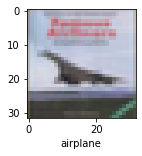

In [36]:
plot_sample(X_test, y_test,3)  #predicting airplane for 3

In [37]:
classes[y_classes[3]]  #actual is airplane

'airplane'

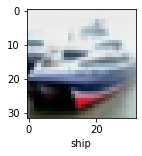

In [38]:
plot_sample(X_test, y_test,1)  #predicting ship for 1

In [40]:
classes[y_classes[1]]  #actual is automobile

'automobile'